# Diffraction Studies Automation
written by: Taylor Contreras, Feb 5 2021

This code controls the automation of the oscilliscope and the motors to take measurements of the light intensity of a SiPM. An LED is aligned with a diffraction grating in front of the SiPM. The SiPM and LED are on tracks that can move vertically. This allows the calibration of the SiPM with no light and for the measurement of light intensity as a function of angle from the diffraction grating. 

See other notebooks for more details and tests (PyVisa_tutorial.ipynb, Ardruino_testing.ipynb, Motot_control_testing.ipynb)

In [5]:
from motor import Motor
import oscilloscope as osc
from experiment import Experiment
#import run

import pyvisa
import pyfirmata

### Connect to the oscilliscope

In [6]:
# Before running, connect the laptop to the oscilloscope through the USBTMC
rm = pyvisa.ResourceManager()
# Use the name this prints to grab the instrument in the next step
rm.list_resources() 

('USB0::0x05FF::0x1023::4206N21552::INSTR',
 'ASRL3::INSTR',
 'ASRL4::INSTR',
 'ASRL5::INSTR',
 'ASRL6::INSTR',
 'ASRL7::INSTR',
 'ASRL8::INSTR',
 'ASRL9::INSTR',
 'ASRL10::INSTR',
 'ASRL12::INSTR')

In [7]:
# Grabs the instrument and prints name
scope = rm.open_resource('USB0::0x05FF::0x1023::4206N21552::INSTR')

### Connect to the Arduino

In [8]:
# Use Arduino IDE to find the port name
# under Tools->Port
# This time is was COM3
board = pyfirmata.Arduino('COM3')
it = pyfirmata.util.Iterator(board)
it.start()
#board_led = pyfirmata.Arduino('COM3')
#board_sipm = pyfirmata.Arduino('COM4') 

### Make 'exp' to hold all the experiment objects and variables

In [9]:
# Creat sipm and led motor class objects
sipm_step_pin = 8
sipm_dir_pin = 9
sipm_button_pin = 5
led_step_pin = 10
led_dir_pin = 11
led_button_pin = 6
sipm_motor = Motor(board, sipm_step_pin, sipm_dir_pin, sipm_button_pin, 'sipm')
led_motor = Motor(board, led_step_pin, led_dir_pin, led_button_pin, 'led')
#sipm_motor.CreatePositionFile()
#led_motor.CreatePositionFile()

In [10]:
exp = Experiment(sipm_motor, led_motor, scope)

### Testing and adjusting variables

In [41]:
exp.led_motor.MoveMotor(-5)

In [32]:
exp.sipm_motor.MoveMotor(10)
exp.sipm_motor.MoveMotor(-10)
exp.led_motor.MoveMotor(10)
exp.led_motor.MoveMotor(-10)

In [39]:
exp.sipm_motor.MoveMotor(-30)
exp.led_motor.MoveMotor(-30)

for i in range(0,300):
    exp.sipm_motor.MoveMotor(.1)
    exp.led_motor.MoveMotor(.1)

In [16]:
#exp.ResetZero()

Unplug motors and move them to the bottom


In [29]:
exp.Align("grating")

In [11]:
osc.MeasurePeaktoPeak(scope, 10)

0.0115131072201393

In [24]:
for i in range(0,2000):
    exp.led_motor.step(1)
    exp.sipm_motor.step(1)

In [22]:
exp.sipm_motor.GetCurrentPosition()

69.83500000000001

In [20]:
-exp.sipm_motor.GetCurrentPosition() + exp.grating_led_pos

-8.844999999999999

In [26]:
exp.Set_sipm_offset(13.86-5) #-exp.sipm_motor.GetCurrentPosition() + exp.grating_led_pos)

# Runs

'150/150'

Saving Global Variables


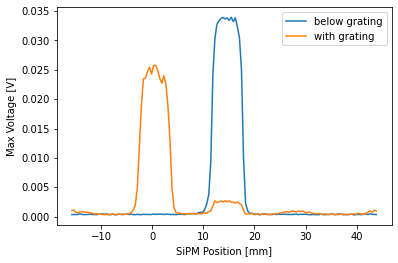

In [7]:
exp.Run('test.csv')

'150/150'

Saving Global Variables


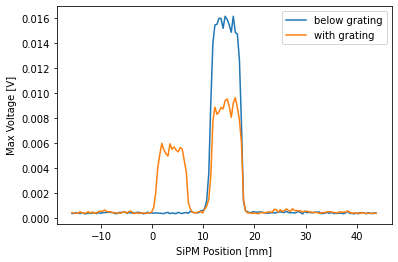

In [8]:
exp.Run('run017_distilled_water_data_50ns_15sweeps_airgap.csv')

'150/150'

Saving Global Variables


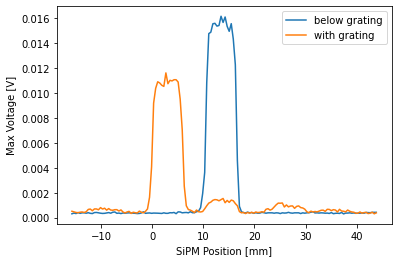

In [10]:
exp.Run('run018_distilled_water_data_50ns_15sweeps_airgap.csv')

'150/150'

Saving Global Variables


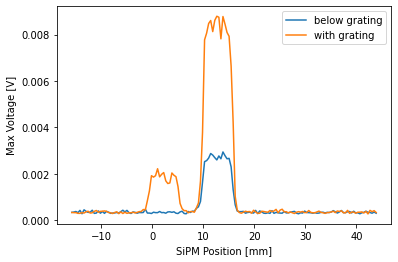

In [15]:
exp.Run('run019_distilled_glucose_water_data_50ns_15sweeps_airgap.csv')

'150/150'

Saving Global Variables


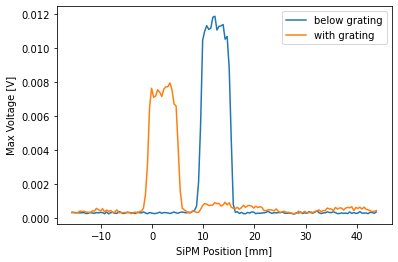

In [28]:
exp.Run('run020_distilled_glucose_water_data_50ns_15sweeps_airgap.csv')

'150/150'

Saving Global Variables


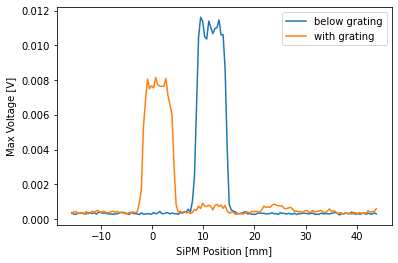

In [29]:
exp.Run('run021_distilled_glucose_water_data_50ns_15sweeps_airgap.csv')

'150/150'

Saving Global Variables


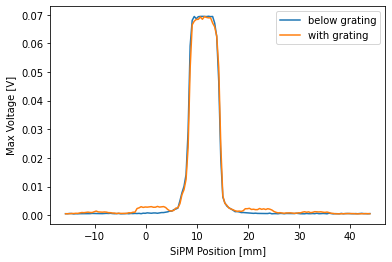

In [9]:
exp.Run('run022_distilled_glucose_water_data_50ns_15sweeps_nogap.csv')

'150/150'

Saving Global Variables


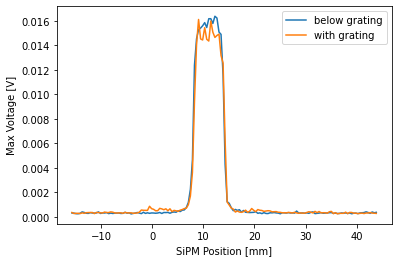

In [12]:
exp.Run('run023_distilled_glucose_water_data_50ns_15sweeps_nogap.csv')

'150/150'

Saving Global Variables


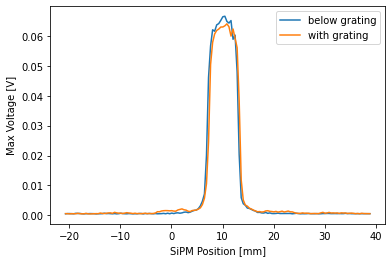

In [28]:
exp.Run('run024_distilled_glucose_water_data_50ns_15sweeps_nogap.csv')

# Close after done running

In [ ]:
# Make sure to close the connection (in teh reverse order of setting it up)
scope.close()
rm.close()